# Nonlinearity

__Goal:__ To study the behavior of the conditional entropy estimator for a very nonlinear relationship as a function of the number of samples. Intuitively, we expect to see a value of entropy which decrease and converge to the true value when the number of samples tends to infinity.

In [32]:
import os
import sys

sys.path.insert(0, os.path.join(os.path.abspath(""), "..", ".."))

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from infovar.stats import entropy_estimators as ee

## $\mathbb{R} \to \mathbb{R}$ relation

In [33]:
# You can define any R -> R function that you want

def fun(x: np.ndarray):
    return np.sin(2*np.pi*2*x)

In [34]:
a, b = 0, 1

x = np.linspace(a, b, 1000)
y = fun(x)

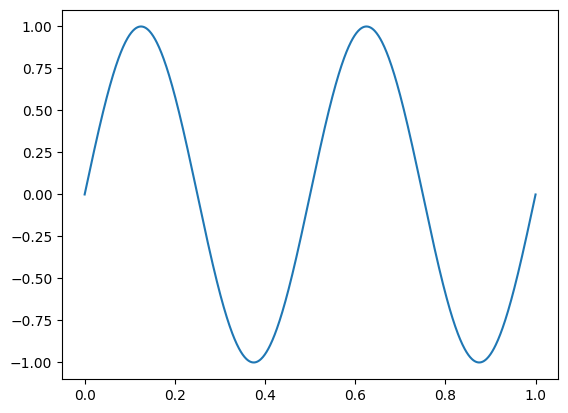

In [35]:
plt.figure()

plt.plot(x, y)

plt.show()

In [36]:
n_samples = np.logspace(1, 6, 50).round().astype(int)
noise_level = 0.01

true_entropy = 0.5 * np.log2(2*np.pi*np.e*noise_level**2)

In [37]:
samples = (b-a) * np.random.random(size=n_samples[-1]) + a
noise = np.random.normal(0, noise_level, size=n_samples[-1])

entropies = []

for n in tqdm(n_samples):

    x = samples[:n].reshape(-1, 1)
    y = fun(x) + noise[:n].reshape(-1, 1)

    h = ee.centropy(y, x)
    entropies.append(h)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:22<00:00,  2.25it/s] 


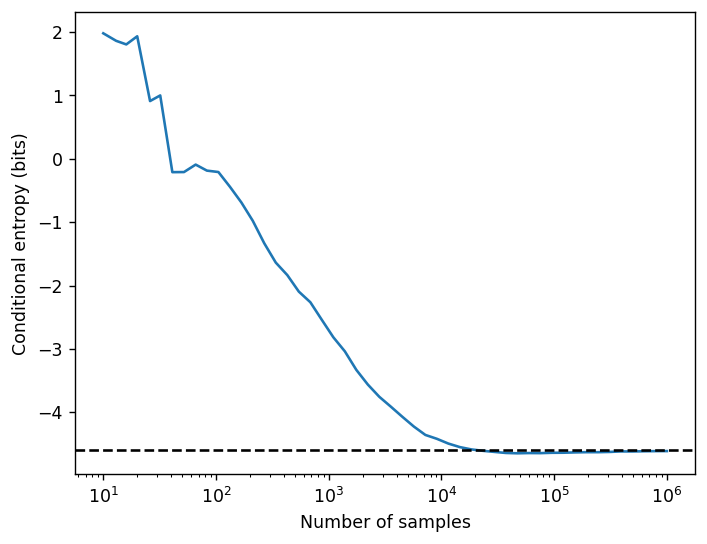

In [38]:
plt.figure(dpi=125)

plt.semilogx(n_samples, entropies)
plt.axhline(true_entropy, linestyle="--", color="black")

plt.xlabel("Number of samples")
plt.ylabel("Conditional entropy (bits)")

plt.show()

## $\mathbb{R}^n \to \mathbb{R}^m$ relation

The lower the noise level, the more samples are needed to converge on the true entropy value.

In [78]:
# You can define any R^n -> R^m function that you want

def fun(X: np.ndarray):
    return np.column_stack((
        np.sin(2*np.pi*np.sum(X, axis=1)),
    ))

dim_in = 2
dim_out = 1
a, b = -1, 1

In [79]:
n_samples = np.logspace(1, 6, 50).round().astype(int)
noise_level = 0.05

true_entropy = 0.5 * np.log2(2*np.pi*np.e*noise_level**2) * dim_out

In [80]:
samples = (b-a) * np.random.random(size=(n_samples[-1], dim_in)) + a
noise = np.random.normal(0, noise_level, size=(n_samples[-1], dim_out))

entropies = []

for n in tqdm(n_samples):

    x = samples[:n]
    y = fun(x) + noise[:n]

    h = ee.centropy(y, x)
    entropies.append(h)

100%|██████████| 50/50 [00:30<00:00,  1.62it/s] 


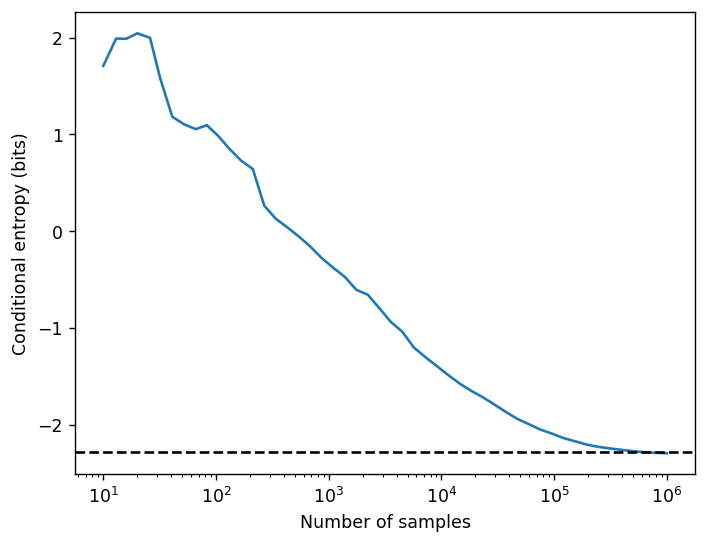

In [81]:
plt.figure(dpi=125)

plt.semilogx(n_samples, entropies)
plt.axhline(true_entropy, linestyle="--", color="black")

plt.xlabel("Number of samples")
plt.ylabel("Conditional entropy (bits)")

plt.show()